In [3]:
import pandas as pd

# inbounds loads

In [80]:
df_inbound = pd.read_csv("inbound_loads.csv", index_col=0)
# print(df_inbound.shape)
df_inbound.head()


,warehouse_order_number,customer_code,load_reference_number,carrier_code,front_temperature,middle_temperature,back_temperature,net_weight,weight_uom,case_quantity,pallet_count,load_start_datetime,load_finish_datetime,signout_datetime,dock_door_number,trailer_number,truck_signin_datetime
0,1290649.0,2537.0,I42171197,TMDN,-1.0,-1.0,-1.0,39000.0,pounds,1625.0,24.0,2019-02-11 04:42:00,2019-02-11 04:51:00,2019-02-11 04:19:10,59.0,1362664,2019-02-11 02:00:09
1,1293130.0,2537.0,I42169605,CKKI,4.0,4.0,4.0,29561.0,pounds,1232.0,26.0,2019-01-16 10:11:00,2019-01-16 11:27:00,2019-01-16 09:57:04,60.0,MWCU5258117,2019-01-16 07:24:26
2,1298947.0,2537.0,I42178319,CKTH,NaN,NaN,NaN,39984.0,pounds,1666.0,24.0,2019-07-30 09:59:00,2019-07-30 10:18:00,2019-07-30 10:21:11,61.0,CGMU5027645,2019-07-30 07:21:09
3,1299947.0,2537.0,I42169266,NTGO,-10.0,-7.0,-6.0,37800.0,pounds,1260.0,18.0,2019-01-10 08:51:00,2019-01-10 08:58:00,NaN,58.0,54087,2019-01-10 08:04:05
4,1299948.0,2537.0,I42169269,NTGO,3.0,4.0,5.0,41394.0,pounds,1380.0,18.0,2019-01-10 07:26:00,2019-01-10 08:08:00,2019-01-10 07:43:34,56.0,305266,2019-01-10 04:29:02


In [78]:
f = ['front_temperature', 'middle_temperature', 'back_temperature', 'case_quantity', 'pallet_count', 
     'load_start_datetime', 'load_finish_datetime', 'signout_datetime', 'dock_door_number','truck_signin_datetime']
df_inbound.iloc[[55791, 55929]]

,warehouse_order_number,customer_code,load_reference_number,carrier_code,front_temperature,middle_temperature,back_temperature,net_weight,weight_uom,case_quantity,pallet_count,load_start_datetime,load_finish_datetime,signout_datetime,dock_door_number,trailer_number,truck_signin_datetime
55791,1512972.0,8873.0,I361060794,JBHZ,NaN,NaN,NaN,10668.0,pounds,2100.0,28.0,2021-12-31 11:35:00,2021-12-31 11:58:00,2021-12-31 12:29:31,35.0,567732,2021-12-31 07:37:40
55929,1513957.0,8873.0,I361060794,JBHZ,NaN,NaN,NaN,13608.0,pounds,504.0,12.0,2021-12-31 11:35:00,2021-12-31 11:58:00,2021-12-31 12:29:31,35.0,567732,2021-12-31 07:37:40


## Subset of start and finish loading times

Load start and finish datetime are the same for each row with the same load_reference_number.
Therefore, group by load_reference_number first!! 

In [102]:
f_time = ['load_reference_number', 'load_start_datetime', 'load_finish_datetime', 'dock_door_number']
df_load_times = df_inbound[f_time]
# Drop NaNs and group by load_reference_number
df_load_times = df_load_times.dropna().drop_duplicates()
df_load_times[['load_start_datetime', 'load_finish_datetime']] = df_load_times[['load_start_datetime', 'load_finish_datetime']].apply(pd.to_datetime)

# calculate the duration of the loading
df_load_times['load_duration'] = (df_load_times['load_finish_datetime'] - df_load_times['load_start_datetime']) / pd.Timedelta(minutes=1)

# round by nearest 10 min to make it easier to compare
df_load_times['load_finish'] = df_load_times['load_finish_datetime'].round('10min')
df_load_times = df_load_times.sort_values(by='load_finish')

# df_load_times
df_load_times[df_load_times['load_finish'].duplicated(keep=False)]
# df_load_times[df_load_times['load_reference_number']== 'I42171197']

,load_reference_number,load_start_datetime,load_finish_datetime,dock_door_number,load_duration,load_finish
250,I42168819,2018-12-31 17:35:00,2018-12-31 17:48:00,70.0,13.0,2018-12-31 17:50:00
252,I42169042,2018-12-31 17:32:00,2018-12-31 17:51:00,52.0,19.0,2018-12-31 17:50:00
256,I42169045,2019-01-01 23:53:00,2019-01-01 23:59:00,57.0,6.0,2019-01-02 00:00:00
246,I42168926,2019-01-02 00:00:00,2019-01-02 00:04:00,35.0,4.0,2019-01-02 00:00:00
254,I42169043,2019-01-02 00:09:00,2019-01-02 00:14:00,48.0,5.0,2019-01-02 00:10:00
...,...,...,...,...,...,...
55891,I361061004,2022-01-03 00:30:00,2022-01-03 00:54:00,22.0,24.0,2022-01-03 00:50:00
56015,I361061430,2022-01-03 12:25:00,2022-01-03 14:18:00,94.0,113.0,2022-01-03 14:20:00
55955,I361061135,2022-01-03 13:12:00,2022-01-03 14:17:00,92.0,65.0,2022-01-03 14:20:00
56099,I361061889,2022-01-03 16:38:00,2022-01-03 17:23:00,40.0,45.0,2022-01-03 17:20:00


In [115]:
# group by load_finish and take the sum of load_duration
df_load_duration = df_load_times.groupby(['load_finish'])['load_duration'].sum().reset_index()
df_load_duration.head(10)
# df_load_duration.iloc[['2018-12-31 17:50:00']]

,load_finish,load_duration
0,2018-12-30 09:40:00,185.0
1,2018-12-31 11:50:00,6.0
2,2018-12-31 14:20:00,24.0
3,2018-12-31 17:10:00,22.0
4,2018-12-31 17:20:00,57.0
5,2018-12-31 17:50:00,32.0
6,2018-12-31 18:10:00,27.0
7,2019-01-02 00:00:00,10.0
8,2019-01-02 00:10:00,17.0
9,2019-01-02 00:40:00,16.0


found in inbound_loads.csv:
* all weight_uom values are in pounds (or NaN)
* 17756 different trailers in use. Some are used >267 times, others only once. 

# pallet history

In [4]:
df_pallet = pd.read_csv('Pallet_history_Gold_Spike.csv', index_col=0)
print(df_pallet.shape)
# df_pallet.head(20)
# val_counts = df['trailer_number'].value_counts() 
# print (val_counts['TNU8521169'])
# [print(x,y) for (x, y) in val_counts[val_counts<2].items()]
# df.loc[df['weight_uom']!='pounds']


(4925535, 14)


In [5]:
df_pallet.head()

,source_system_id,warehouse_facility_id,customer_code,from_location_code,to_location_code,transaction_date,tran_type,quantity,work_type,final_pallet_code,warehouse_pallet_code,lot_code,received_date,move_category
0,11,42,3610,UNASSIGNED,0030130071,2021-11-23 07:43:18,NaN,0,WRONGFULL,NaN,1363587-,1363587,2021-11-21 10:39:33,outbound move
1,11,42,3610,0030130071,0030130071,2021-11-23 07:50:20,NaN,0,WRONGFULL,NaN,1363587-,1363587,2021-11-21 10:39:33,outbound move
2,11,42,3610,0030130071,0030130071,2021-11-23 16:56:53,NaN,0,WRONGFULL,NaN,1363587-,1363587,2021-11-21 10:39:33,outbound move
3,11,42,3610,UNASSIGNED,0030130071,2021-11-23 07:43:18,NaN,0,WRONGFULL,NaN,1364144-,1364144,2021-11-21 10:39:33,outbound move
4,11,42,3610,0030130071,0030130071,2021-11-23 07:50:20,NaN,0,WRONGFULL,NaN,1364144-,1364144,2021-11-21 10:39:33,outbound move


In [13]:
# not_same = df_pallet[df_pallet['warehouse_pallet_code']!=df_pallet['final_pallet_code']]
df_pallet['work_type'].value_counts()

# for c in df_pallet.columns:
#     display(df_pallet[c].value_counts())


work_type
FULLS         1283584
MOVE          1066965
PUTAWAYS      1064119
STAGE          459850
PARTIALS-V     421453
SWAPFULL       140374
DROPS          121828
INBOUNDRUN      61493
WRONGFULL       58373
ANYFULL         51160
CHRYPICK-S      44122
RELOS           43206
PARTIALS-S      40809
FULLCHGLOC      29580
SWAPDROP        19423
UN-LOAD          8353
LOCCHANGE        6608
RELORUN          2239
FULLRELO         1080
REVDROPS          735
DROPRETURN        102
DROPRELO           79
Name: count, dtype: int64

found in Pallet_history_Gold_Spike.csv:
* all source_system_id are 11
* all warehouse_facility_id are 42 (same warehouse for all)
* all final_pallet_code are NaN

Columns to drop:
* source_system_id
* warehouse_facility_id
* tran_type
* final_pallet_code

In [11]:
f = ['from_location_code', 'to_location_code', 'transaction_date', 'quantity', 'work_type', 'warehouse_pallet_code', 'lot_code', 
     'received_date', 'move_category' ]
df_pallet[f].head(20)
# df_pallet['warehouse_pallet_code'].head(10)

,from_location_code,to_location_code,transaction_date,quantity,work_type,warehouse_pallet_code,lot_code,received_date,move_category
0,UNASSIGNED,0030130071,2021-11-23 07:43:18,0,WRONGFULL,1363587-,1363587,2021-11-21 10:39:33,outbound move
1,0030130071,0030130071,2021-11-23 07:50:20,0,WRONGFULL,1363587-,1363587,2021-11-21 10:39:33,outbound move
2,0030130071,0030130071,2021-11-23 16:56:53,0,WRONGFULL,1363587-,1363587,2021-11-21 10:39:33,outbound move
3,UNASSIGNED,0030130071,2021-11-23 07:43:18,0,WRONGFULL,1364144-,1364144,2021-11-21 10:39:33,outbound move
4,0030130071,0030130071,2021-11-23 07:50:20,0,WRONGFULL,1364144-,1364144,2021-11-21 10:39:33,outbound move
5,0030130071,0030130071,2021-11-23 16:56:53,0,WRONGFULL,1364144-,1364144,2021-11-21 10:39:33,outbound move
6,UNASSIGNED,0030130071,2021-11-23 07:43:18,0,WRONGFULL,1364970-,1364970,2021-11-21 10:39:33,outbound move
7,0030130071,0030130071,2021-11-23 07:50:20,0,WRONGFULL,1364970-,1364970,2021-11-21 10:39:33,outbound move
8,0030130071,0030130071,2021-11-23 16:56:53,0,WRONGFULL,1364970-,1364970,2021-11-21 10:39:33,outbound move
9,UNASSIGNED,CFORK15449,2021-11-10 00:54:06,10,MOVE,1366438-,1366438,2021-11-09 16:56:57,location move


# weather


In [5]:
df_weather = pd.read_csv("weather.csv", index_col=0)
df_weather.describe()

,Relative Humidity,Temperature,hour
count,325666.000000,327728.000000,328242.000000
mean,67.175292,66.104457,11.483485
std,20.652946,17.073400,6.925141
min,9.020000,-2.200000,0.000000
25%,51.580000,53.600000,5.000000
50%,68.810000,68.000000,11.000000
75%,83.370000,78.800000,17.000000
max,100.000000,107.600000,23.000000


In [6]:
# Remove timezone and convert to datetime object
df_weather = df_weather.drop(['datetime_UTC','hour'], axis='columns')
df_weather['datetime'] = df_weather['datetime'].apply(lambda x: x[:-6])
df_weather['datetime'] = pd.to_datetime(df_weather['datetime'])

In [7]:
df_weather

,datetime,Relative Humidity,Temperature
0,2018-12-31 18:00:00,50.37,53.6
1,2018-12-31 18:05:00,50.37,53.6
2,2018-12-31 18:10:00,50.37,53.6
3,2018-12-31 18:15:00,50.37,53.6
4,2018-12-31 18:20:00,50.37,53.6
...,...,...,...
328237,2021-12-31 17:35:00,82.89,68.0
328238,2021-12-31 17:40:00,82.89,68.0
328239,2021-12-31 17:45:00,82.89,68.0
328240,2021-12-31 17:50:00,82.89,68.0


# Demand kwtrain val


In [8]:
df_demand = pd.read_csv("demand_kWtrain_val.csv", index_col=0)
df_demand['datetime_local'] = pd.to_datetime(df_demand['datetime_local']) # Convert to datetime object
df_demand

C:\Users\roell\AppData\Local\Temp\ipykernel_15508\3650327429.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_demand['datetime_local'] = pd.to_datetime(df_demand['datetime_local']) # Convert to datetime object


,datetime_local,demand_kW
0,2018-12-31 21:15:00,2064.101392
1,2018-12-31 21:30:00,1874.002081
2,2018-12-31 21:45:00,1988.168511
3,2018-12-31 22:00:00,2022.795943
4,2018-12-31 22:15:00,1986.981872
...,...,...
365344,2021-12-13 17:55:00,NaN
365345,2021-12-13 17:56:00,NaN
365346,2021-12-13 17:57:00,NaN
365347,2021-12-13 17:58:00,NaN


# Merge df_demand and df_weather

Merge df_demand and df_weather so that you get the humidity and temperature at the given datetime.


In [9]:
df_demand_sorted = df_demand.sort_values('datetime_local') # first sort datetime to use merge_asof
df_weather_sorted = df_weather.sort_values('datetime')
df_demand_temp = pd.merge_asof(df_demand_sorted, df_weather_sorted, left_on="datetime_local", right_on="datetime", direction='nearest')
df_demand_temp

,datetime_local,demand_kW,datetime,Relative Humidity,Temperature
0,2018-12-31 21:15:00,2064.101392,2018-12-31 21:15:00,61.27,46.4
1,2018-12-31 21:30:00,1874.002081,2018-12-31 21:30:00,61.27,46.4
2,2018-12-31 21:45:00,1988.168511,2018-12-31 21:45:00,65.60,44.6
3,2018-12-31 22:00:00,2022.795943,2018-12-31 22:00:00,65.60,44.6
4,2018-12-31 22:15:00,1986.981872,2018-12-31 22:15:00,65.60,44.6
...,...,...,...,...,...
365344,2021-12-13 17:55:00,NaN,2021-12-13 17:50:00,55.15,60.8
365345,2021-12-13 17:56:00,NaN,2021-12-13 18:00:00,55.15,60.8
365346,2021-12-13 17:57:00,NaN,2021-12-13 18:00:00,55.15,60.8
365347,2021-12-13 17:58:00,NaN,2021-12-13 18:00:00,55.15,60.8


# Run model

## Split train and test data

In [10]:
df_demand_train = df_demand_temp[df_demand_temp['demand_kW'].notna()]
df_demand_test = df_demand_temp[df_demand_temp['demand_kW'].isna()]

In [11]:
len(df_demand_train),len(df_demand_test)

(273988, 91361)

In [12]:
df_demand_test

,datetime_local,demand_kW,datetime,Relative Humidity,Temperature
273988,2021-10-11 06:08:00,NaN,2021-10-11 06:10:00,87.75,57.2
273989,2021-10-11 06:09:00,NaN,2021-10-11 06:10:00,87.75,57.2
273990,2021-10-11 06:10:00,NaN,2021-10-11 06:10:00,87.75,57.2
273991,2021-10-11 06:11:00,NaN,2021-10-11 06:10:00,87.75,57.2
273992,2021-10-11 06:12:00,NaN,2021-10-11 06:10:00,87.75,57.2
...,...,...,...,...,...
365344,2021-12-13 17:55:00,NaN,2021-12-13 17:50:00,55.15,60.8
365345,2021-12-13 17:56:00,NaN,2021-12-13 18:00:00,55.15,60.8
365346,2021-12-13 17:57:00,NaN,2021-12-13 18:00:00,55.15,60.8
365347,2021-12-13 17:58:00,NaN,2021-12-13 18:00:00,55.15,60.8


## XGBoost

In [13]:
from xgboost import XGBClassifier, XGBRegressor
# read data
from sklearn.model_selection import train_test_split

features_to_use = ['Relative Humidity', 'Temperature'] #cannot use datetime in training, since its not numerical!

X, y = df_demand_train[features_to_use], df_demand_train['demand_kW']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# create model instance
# bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
bst = XGBRegressor()

# fit model
bst.fit(X_train, y_train)
train_score = bst.score(X_train, y_train)
display(f"Train score: {train_score}")

'Train score: 0.5800831237719941'

Validation

In [18]:
from sklearn.metrics import mean_squared_error
# make predictions
y_pred = bst.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

In [23]:
import numpy as np
import math

print("MSE:", mse)
rootmse = math.sqrt(mse)
print("RootMSE:", rootmse)
m = np.mean(y_test)
print("Mean value y_test:", m)
print("RelRootMSE:", rootmse/m, f"== {(rootmse/m)*100:.1f}%")

MSE: 85151.65783122338
RootMSE: 291.8075698662106
Mean value y_test: 2405.9763652929873
RelRootMSE: 0.12128447065217775 == 12.1%


In [24]:
for true, pred in zip(y_test, y_pred):
    diff = abs(pred - true)
    if diff > 2000:
        print(f"Predicted: {pred}, True: {true}, Difference: {diff}")

Predicted: 2445.567138671875, True: 363.1900611, Difference: 2082.377077571875
Predicted: 2427.2763671875, True: 349.04512, Difference: 2078.2312471875002


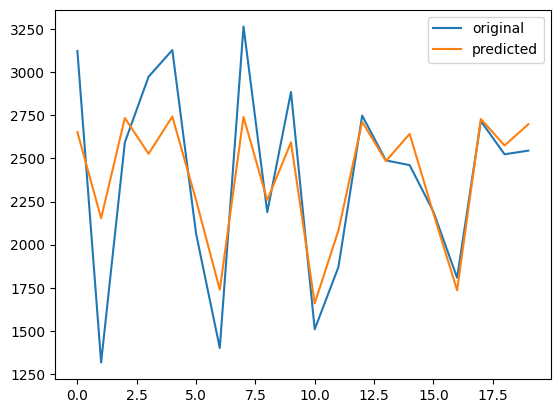

In [25]:
import matplotlib.pyplot as plt

n = 20
x_ax = range(n)
plt.plot(x_ax, y_test[:n], label='original')
plt.plot(x_ax, y_pred[:n], label= 'predicted')
plt.legend()
plt.show()

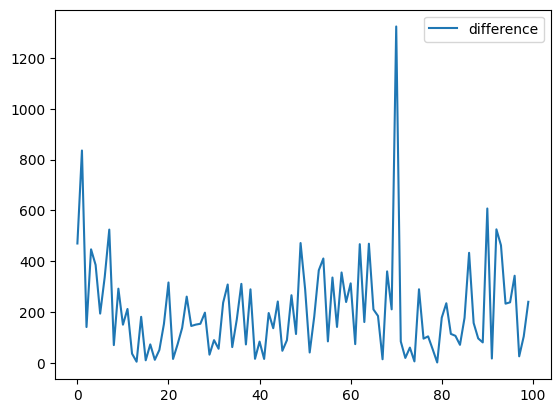

In [26]:
n=100

diff = abs(y_test - y_pred)
x_ax = range(n)
plt.plot(x_ax, diff[:n], label='difference')
plt.legend()
plt.show()

Actual test prediction

In [28]:
features_to_use = ['Relative Humidity', 'Temperature'] #cannot use datetime in training, since its not numerical!
input = df_demand_test[features_to_use]
predictions = bst.predict(input)

In [29]:
res = predictions.tolist()
res

[1719.509033203125,
 1719.509033203125,
 1719.509033203125,
 1719.509033203125,
 1719.509033203125,
 1719.509033203125,
 1719.509033203125,
 1719.509033203125,
 1719.509033203125,
 1719.509033203125,
 1719.509033203125,
 1719.509033203125,
 1719.509033203125,
 1719.509033203125,
 1719.509033203125,
 1719.509033203125,
 1719.509033203125,
 1719.509033203125,
 1719.509033203125,
 1719.509033203125,
 1719.509033203125,
 1719.509033203125,
 1719.509033203125,
 1719.509033203125,
 1719.509033203125,
 1804.5240478515625,
 1804.5240478515625,
 1804.5240478515625,
 1804.5240478515625,
 1804.5240478515625,
 1804.5240478515625,
 1804.5240478515625,
 1804.5240478515625,
 1804.5240478515625,
 1804.5240478515625,
 1804.5240478515625,
 1804.5240478515625,
 1804.5240478515625,
 1804.5240478515625,
 1804.5240478515625,
 1719.509033203125,
 1719.509033203125,
 1719.509033203125,
 1719.509033203125,
 1839.6943359375,
 1839.6943359375,
 1839.6943359375,
 1719.509033203125,
 1719.509033203125,
 1719.50903

In [30]:
df_results = pd.DataFrame()
df_results['datetime'] = df_demand_test['datetime'].copy()  # Copy the 'datetime' column
# df_results['Prediction'] = res
# df_results['Test'] = range(len(df_results))

In [31]:
# res_series = pd.Series(res)
df_results['Prediction'] = res


In [32]:
print(df_results)

                  datetime   Prediction
273988 2021-10-11 06:10:00  1719.509033
273989 2021-10-11 06:10:00  1719.509033
273990 2021-10-11 06:10:00  1719.509033
273991 2021-10-11 06:10:00  1719.509033
273992 2021-10-11 06:10:00  1719.509033
...                    ...          ...
365344 2021-12-13 17:50:00  1972.291748
365345 2021-12-13 18:00:00  1972.291748
365346 2021-12-13 18:00:00  1972.291748
365347 2021-12-13 18:00:00  1972.291748
365348 2021-12-13 18:00:00  1972.291748

[91361 rows x 2 columns]


In [33]:
df_results.to_csv(f"results_{'_'.join(features_to_use)}.csv")